<a href="https://colab.research.google.com/github/lucrilhos/regression/blob/main/regressao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas
import numpy
import seaborn
import scipy
import statsmodels

In [ ]:
print('Versão do pandas -> %s' % pandas.__version__)
print('Versão do numpy -> %s' % numpy.__version__)
print('Versão do seaborn -> %s' % seaborn.__version__)
print('Versão do scipy -> %s' % scipy.__version__)
print('Versão do statsmodels -> %s' % statsmodels.__version__)

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns

In [27]:
dados = pd.read_csv('dados.csv')
dados.head()

**o .read que pertence à biblioteca pandas tem como função converter um arquivo .csv em um dataframe, para que em seguida, com o .head seja exibidas as 5 primeiras linhas dos dados, sendo considerada uma amostra.**

In [29]:
dataset = {
    'Y': [3011, 1305, 1879, 2654, 2849, 1068, 2892, 2543, 3074, 849, 2184, 2943, 1357, 2755, 2163, 3099, 1600, 353, 1778, 740, 2129, 3302, 2412, 2683, 2515, 2395, 2292, 1000, 600, 1864, 3027, 1978, 2791, 1982, 900, 1964, 1247, 3067, 700, 1500, 3110, 2644, 1378, 2601, 501, 1292, 2125, 1431, 2260, 1770],
    'X': [9714, 3728, 6062, 8845, 8378, 3338, 8507, 7947, 9915, 1632, 6825, 8918, 4100, 9184, 6180, 9997, 4500, 1069, 5925, 2466, 6083, 9712, 7780, 8383, 7185, 7483, 7640, 2100, 2000, 6012, 8902, 5345, 8210, 5662, 2700, 6546, 2900, 9894, 1500, 5000, 8885, 8813, 3446, 7881, 1164, 3401, 6641, 3329, 6648, 4800]
}
dataset = pd.DataFrame(dataset)
dataset.head()

,Y,X
0,3011,9714
1,1305,3728
2,1879,6062
3,2654,8845
4,2849,8378


In [30]:
dataset.shape

(50, 2)

o .shape retorna o dataframe como uma tupla, indicando o numero de linhas e colunas, **respectivamente**

In [32]:
dataset.describe()

,Y,X
count,50.000000,50.000000
mean,2011.120000,6065.500000
std,817.214648,2707.187812
min,353.000000,1069.000000
25%,1362.250000,3516.500000
50%,2127.000000,6363.000000
75%,2675.750000,8381.750000
max,3302.000000,9997.000000


<Axes: title={'center': 'Box plot'}, xlabel='Reais (R$)'>

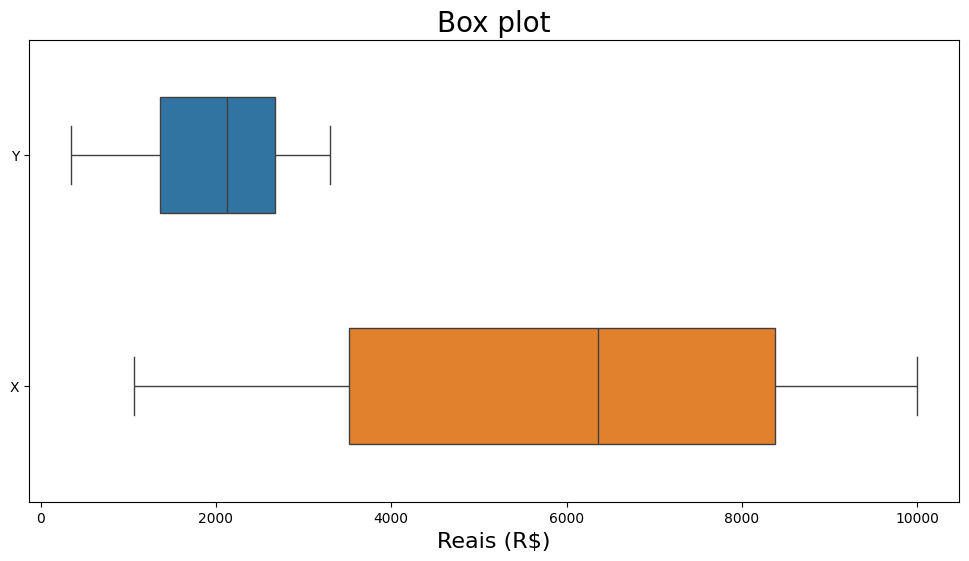

In [33]:
ax = sns.boxplot(data=dataset, orient='h', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Box plot', fontsize=20)
ax.set_xlabel('Reais (R$)', fontsize=16)
ax

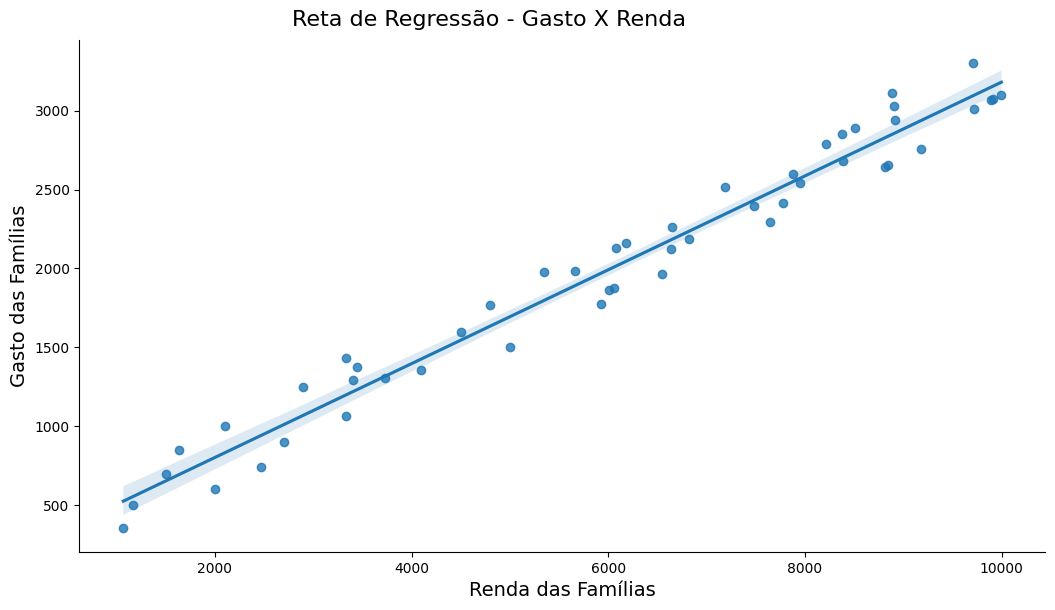

In [35]:
ax = sns.lmplot(x="X", y="Y", data=dataset)
ax.fig.set_size_inches(12, 6)
ax.fig.suptitle('Reta de Regressão - Gasto X Renda', fontsize=16, y=1.02)
ax.set_xlabels("Renda das Famílias", fontsize=14)
ax.set_ylabels("Gasto das Famílias", fontsize=14)
ax

In [37]:
dataset.corr()

,Y,X
Y,1.000000,0.984835
X,0.984835,1.000000


In [49]:
import statsmodels.api as sm

In [52]:
y = dataset['Y']
x = sm.add_constant(dataset['X'])

In [55]:
y.head()

,Y
0,3011
1,1305
2,1879
3,2654
4,2849


In [56]:
x.head()

,const,X
0,1.0,9714
1,1.0,3728
2,1.0,6062
3,1.0,8845
4,1.0,8378


In [59]:
resultado_regressao = sm.OLS(y, x).fit()
print(resultado_regressao.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     1547.
Date:                Wed, 28 May 2025   Prob (F-statistic):           3.56e-38
Time:                        04:00:11   Log-Likelihood:                -318.16
No. Observations:                  50   AIC:                             640.3
Df Residuals:                      48   BIC:                             644.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        207.9033     50.127      4.148      0.0

In [61]:
dataset["y_previsto"] = resultado_regressao.predict()
dataset

,Y,X,y_previsto
0,3011,9714,3095.785086
1,1305,3728,1316.203010
2,1879,6062,2010.079483
3,2654,8845,2837.439476
4,2849,8378,2698.604723
5,1068,3338,1200.259640
6,2892,8507,2736.955222
7,2543,7947,2570.472435
8,3074,9915,3155.540515
9,849,1632,693.081721
